## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings .filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',delimiter = ';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [6]:
df.shape

(4898, 12)

In [7]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [8]:
df['quality'].nunique()

7

## Checking Missing Values

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* There is no missing value present in the dataset

## Exploratory data Analysis (EDA)

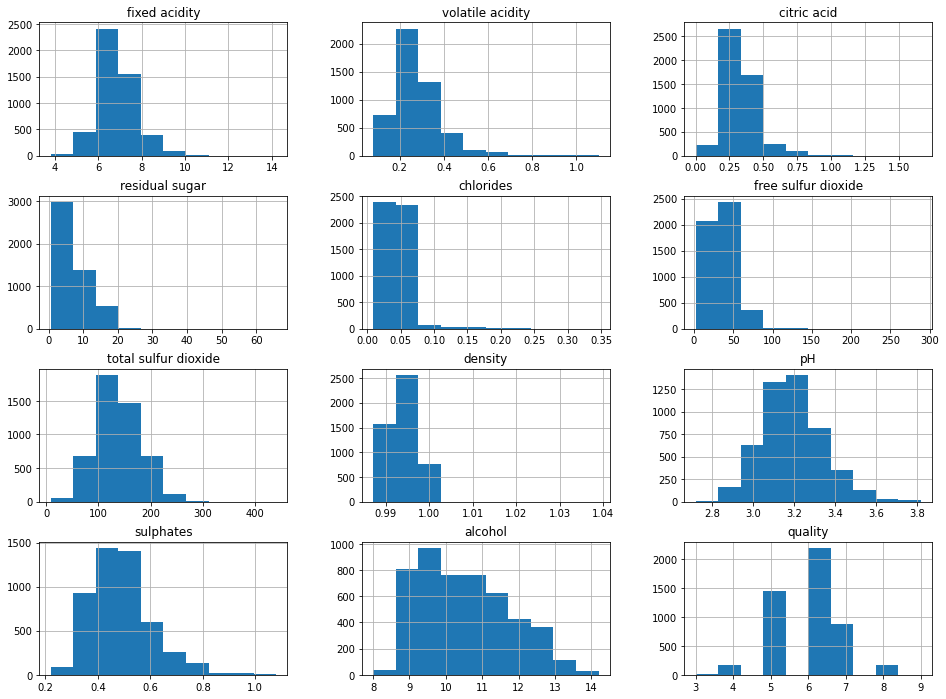

In [10]:
df.hist(figsize = (16,12))
plt.show()

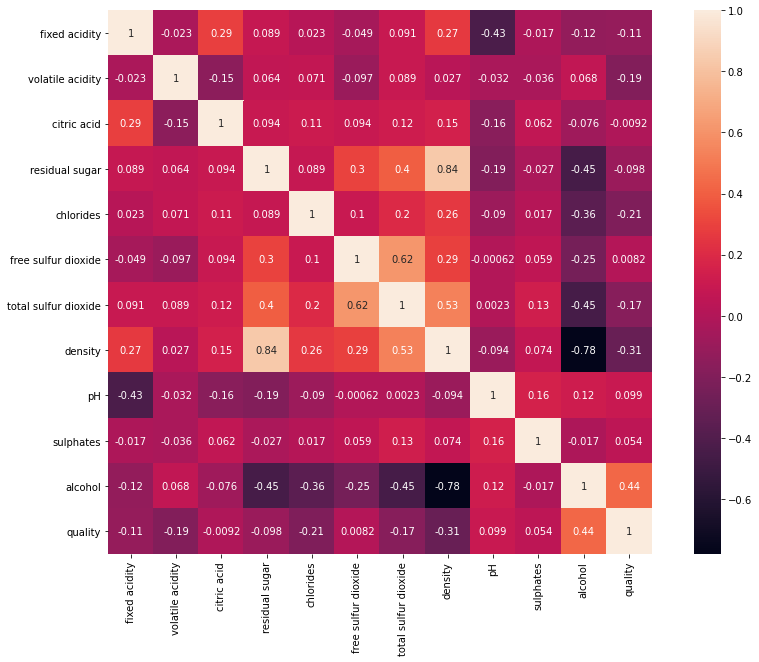

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr() , square = True , annot = True)
plt.show()

 Correlation among variables

* Quality is moderately correlated with alcohol
* Alcohol is moderately correlated with the density of wine apart from being    moderaltely correlated with quality
* Density is strongly correlated with residual sugar quantity and moderately correlated with pH
* Free sulfur dioxide and total sulfur dioxide are strongly correlated




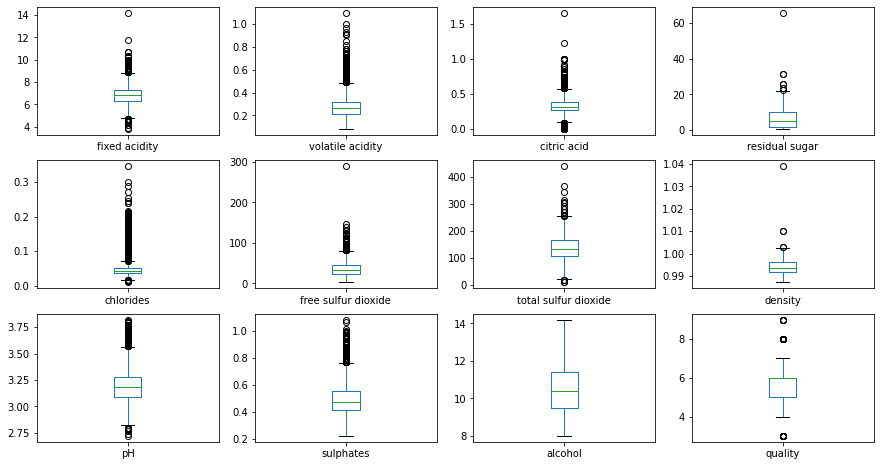

In [12]:
df.plot(kind = 'box' , subplots = True, layout = (3,4) , figsize = (15,8))
plt.show()

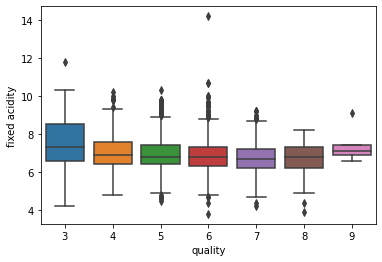

In [13]:
sns.boxplot('quality','fixed acidity',data=df)
plt.show()

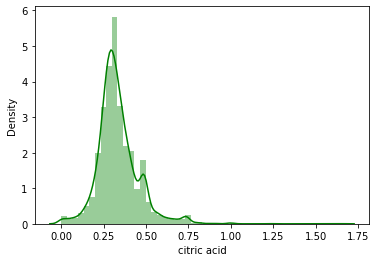

In [14]:
sns.distplot(df['citric acid'], color = 'green')
plt.show()

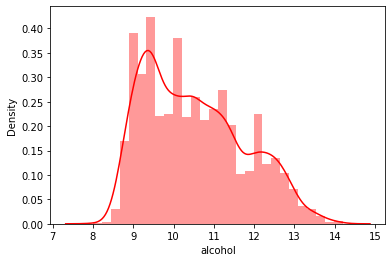

In [15]:
sns.distplot(df['alcohol'], color = 'red')
plt.show()

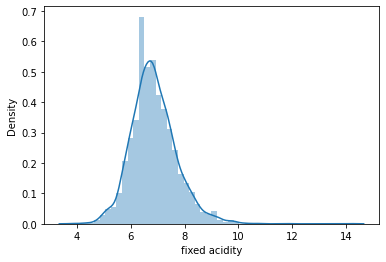

In [16]:
sns.distplot(df['fixed acidity'])
plt.show()

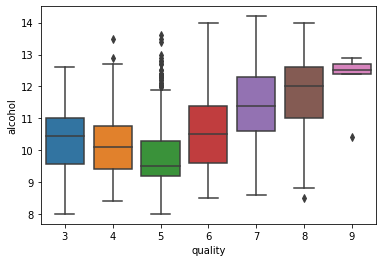

In [17]:
sns.boxplot('quality','alcohol',data=df)
plt.show()

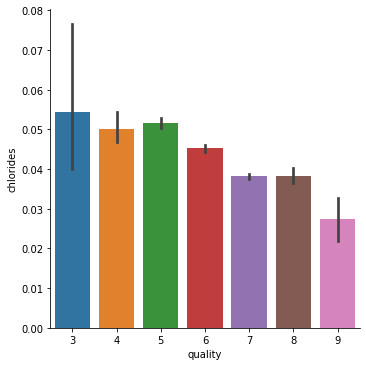

In [18]:
sns.factorplot(x='quality', y = 'chlorides',kind = 'bar',data= df)
plt.show()

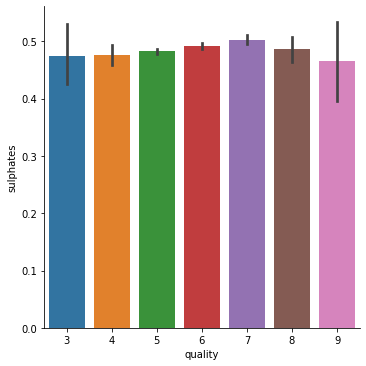

In [19]:
sns.factorplot(x='quality', y = 'sulphates',kind = 'bar',data= df)
plt.show()

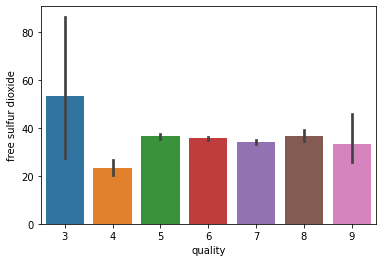

In [20]:
sns.barplot(x = 'quality' , y = 'free sulfur dioxide', data = df)
plt.show()

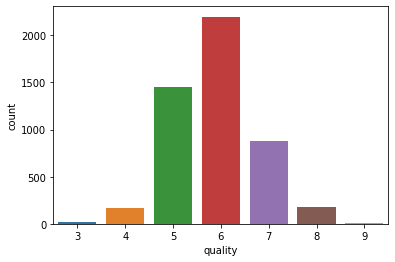

In [21]:
sns.countplot(x = 'quality',data = df)
plt.show()

In [22]:
df.drop(df[(df['volatile acidity']>0.4) ].index, inplace=True)

In [23]:
df.drop(df[(df['free sulfur dioxide']>90) ].index, inplace=True)

In [24]:
df.drop(df[(df['sulphates']>0.7) ].index, inplace=True)

## Drop Irrelevant Columns

In [25]:
df.drop(['chlorides'] , axis = 1 , inplace = True)

## Build The Model

In [26]:
X = df.drop(['quality'] , axis = 1)
y = df['quality']

In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state = 0)

In [28]:
print('Shape of the X_train: ' , X_train.shape)
print('Shape of the X_test: ' , X_test.shape)
print('Shape of the y_train: ' , y_train.shape)
print('Shape of the y_test: ' , y_test.shape)

Shape of the X_train:  (3143, 10)
Shape of the X_test:  (1048, 10)
Shape of the y_train:  (3143,)
Shape of the y_test:  (1048,)


## Logistics Regression Model
We will make a logistics regression model to predict the quality of wine using input variables. First we will split our dataset into training and testing sets and then create a logistic regression model using the training set.

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
print(accuracy_score(y_train , y_train_pred))
print(accuracy_score(y_test , y_test_pred))

0.4820235443843462
0.4627862595419847


## Visualising Results

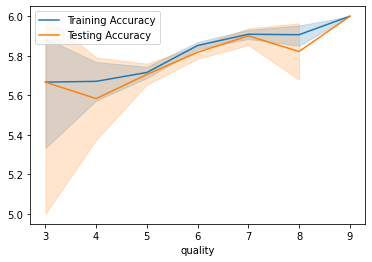

In [33]:
sns.lineplot(y_train , y_train_pred , label = 'Training Accuracy')
sns.lineplot(y_test , y_test_pred , label = 'Testing Accuracy')
plt.show()

# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [36]:
print(accuracy_score(y_train , y_train_pred))
print(accuracy_score(y_test , y_test_pred))

0.7324212535793827
0.7299618320610687


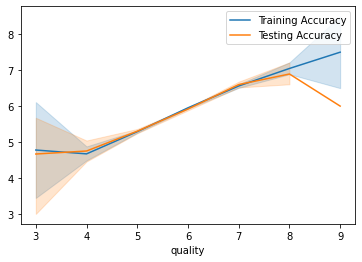

In [37]:
sns.lineplot(y_train , y_train_pred , label = 'Training Accuracy')
sns.lineplot(y_test , y_test_pred , label = 'Testing Accuracy')
plt.show()



# Random Forest Classifier
* A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [40]:
print('accuracy of Training Data : ',accuracy_score(y_train , y_train_pred))
print('accuracy of Testing Data : ',accuracy_score(y_test , y_test_pred))

accuracy of Training Data :  0.9866369710467706
accuracy of Testing Data :  0.9875954198473282


## Visualising Results

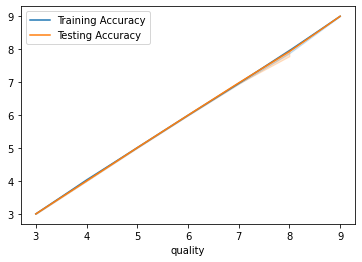

In [41]:
sns.lineplot(y_train , y_train_pred , label = 'Training Accuracy')
sns.lineplot(y_test , y_test_pred , label = 'Testing Accuracy')
plt.show()